In [35]:
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

In [9]:
# dem
# point 1:, point 2
# stream raster
# subbasin = 15

# sampledata/
#.    1805000203/
#.        full/
#.            dem.tif
#.            flowpaths_identified.tif
#.            points.shp
#.        subcatchment/
#.            15_flowpath.tif
#.            15_dem.tif
#.            15_points.shp

In [25]:
dem = rioxarray.open_rasterio("/Users/arthurkoehl/programs/pasternack/pyvalleys/data/1805000203-dem.tif", masked=True).squeeze()
streams = rioxarray.open_rasterio("/Users/arthurkoehl/programs/pasternack/pyvalleys/data/testing/flowpaths_identified.tif", masked=True).squeeze()
subbasins = rioxarray.open_rasterio("/Users/arthurkoehl/programs/pasternack/pyvalleys/data/testing/subbasins.tif", masked=True).squeeze()
streams_shp = gpd.read_file("/Users/arthurkoehl/programs/pasternack/pyvalleys/data/testing/flowpaths.shp")

In [61]:
big = gpd.GeoSeries([Point(-224179, 43123), Point(-216735, 35597)], crs="3310")
small = gpd.GeoSeries([Point(-220624, 36032), Point(-219663, 35749)], crs="3310")

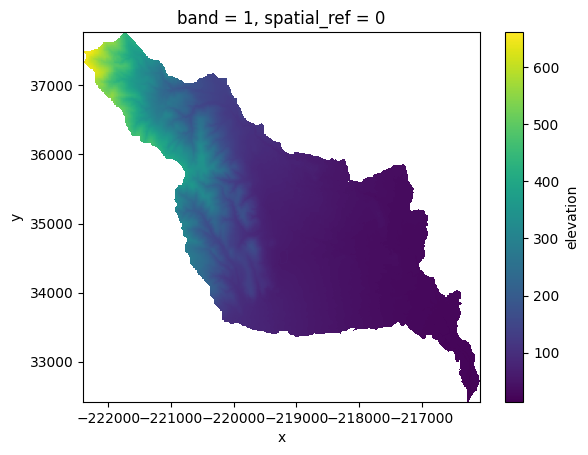

In [17]:
# clip dem to subbasin extent
# clip streams to subbasin extent AND where STRM_VAL = subbasin id
dem_clipped = dem.where(subbasins == 15, drop=True)
dem_clipped.plot()

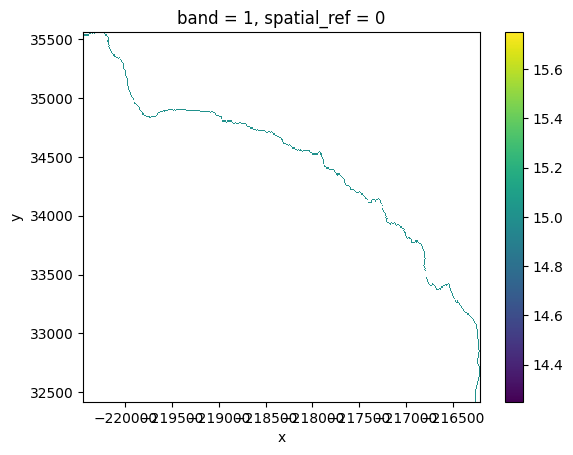

In [23]:
streams_clipped = streams.where(streams == 15, drop=True)
streams_clipped.plot()

<Axes: >

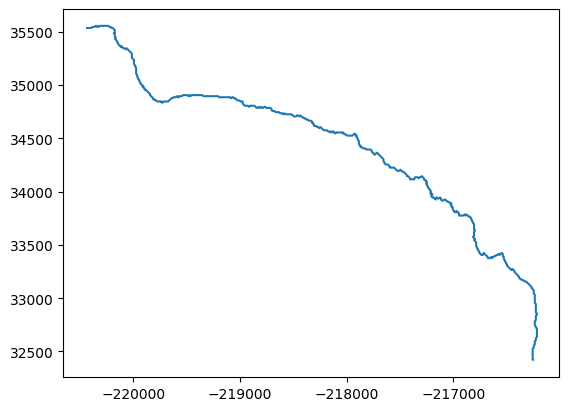

In [30]:
streams_shp_clipped = streams_shp.loc[streams_shp['STRM_VAL'] == 15]
streams_shp_clipped.plot()

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

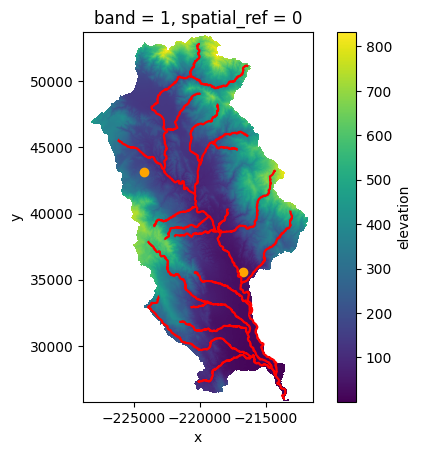

In [63]:
fig, ax = plt.subplots()
dem.plot(ax=ax)
streams_shp.plot(ax=ax, color='red')
big.plot(ax=ax, color='orange')

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

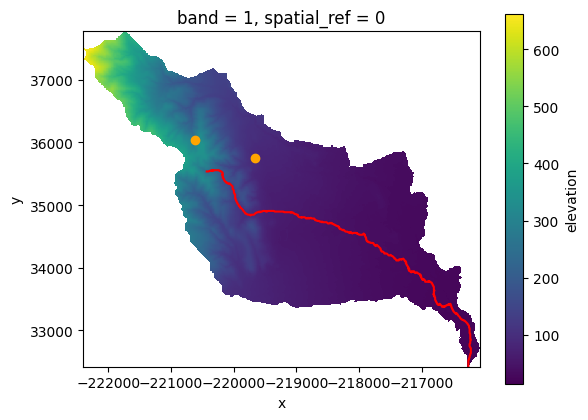

In [64]:
fig, ax = plt.subplots()
dem_clipped.plot(ax=ax)
streams_shp_clipped.plot(ax=ax, color='red')
small.plot(ax=ax, color='orange')

In [67]:
# sampledata/
#.    1805000203/
#.        full/
#.            dem.tif
#.            flowpaths_identified.tif
#.            points.shp
#.        subcatchment/
#.            15_flowpath.tif
#.            15_dem.tif
#.            15_points.shp
import os
os.mkdir('./sampledata/')
os.mkdir('./sampledata/180500203')
os.mkdir('./sampledata/180500203/full')
os.mkdir('./sampledata/180500203/subcatchment')

In [75]:
streams_shp.crs = 'epsg:3310'
streams_shp_clipped.crs = 'epsg:3310'


dem.rio.to_raster('./sampledata/180500203/full/dem.tif')
streams.rio.to_raster('./sampledata/180500203/full/flowpaths.tif')
streams_shp.to_file("./sampledata/180500203/full/flowpaths.shp")

dem_clipped.rio.to_raster('./sampledata/180500203/subcatchment/dem.tif')
streams_clipped.rio.to_raster('./sampledata/180500203/subcatchment/flowpath.tif')
streams_shp_clipped.to_file('./sampledata/180500203/subcatchment/flowpath.shp')

In [77]:
big.to_file('./sampledata/180500203/full/points.shp')
small.to_file('./sampledata/180500203/subcatchment/points.shp')